This chapter dives deeper into the essential time series functionality made available through the pandas DataTimeIndex. It introduces resampling and how to compare different time series by normalizing their start points.

# Compare time series growth rates
## Compare the performance of several asset classes

You have seen in the video how you can easily compare several time series by normalizing their starting points to 100, and plot the result.

To broaden your perspective on financial markets, let's compare four key assets: stocks, bonds, gold, and oil.


## Video

Normalizing a single series

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 5)


In [8]:
pd.read_csv('../stock_data/google.csv').head()

,Date,Close
0,2014-01-02,556.00
1,2014-01-03,551.95
2,2014-01-04,NaN
3,2014-01-05,NaN
4,2014-01-06,558.10


In [10]:
google=pd.read_csv('../stock_data/google.csv',parse_dates=['Date'], index_col='Date')
google.head(3)

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-04,NaN


In [12]:
google.loc['2014-01-02','Close']

556.0

In [11]:
first_price =google.Close.iloc[0]
first_price

556.0

## Normalizing a single Series (2)

In [13]:
normalized = google.Close.div(first_price).mul(100)
normalized

Date
2014-01-02    100.000000
2014-01-03     99.271583
2014-01-04           NaN
2014-01-05           NaN
2014-01-06    100.377698
                 ...    
2016-12-26           NaN
2016-12-27    142.365108
2016-12-28    141.196043
2016-12-29    140.789568
2016-12-30    138.816547
Name: Close, Length: 1094, dtype: float64

<Axes: title={'center': 'Google Normalized Series'}, xlabel='Date'>

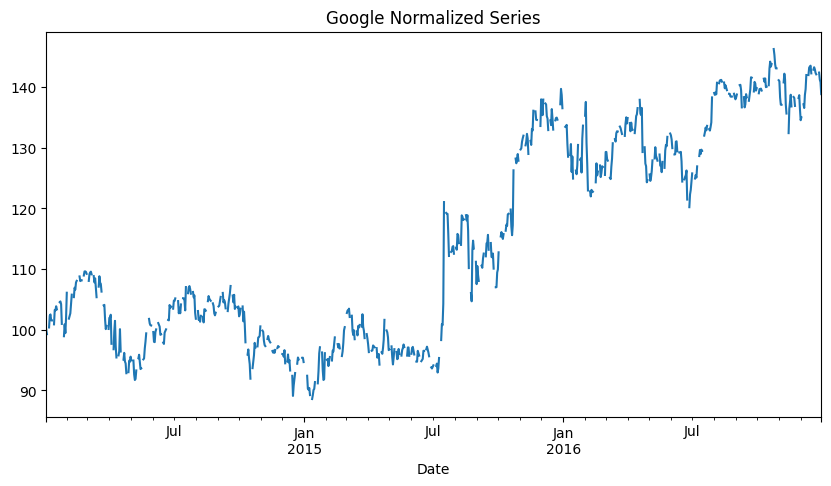

In [14]:
normalized.plot(title='Google Normalized Series')

Google stock increased by about 40% here.

Compare stocks, Google, yahoo and Apple

In [26]:
pd.read_csv('../stock_data/stock_data.csv').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1762 entries, 0 to 1761
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1762 non-null   object 
 1   AAPL    1761 non-null   float64
 2   AMGN    1761 non-null   float64
 3   AMZN    1761 non-null   float64
 4   CPRT    1761 non-null   float64
 5   EL      1762 non-null   float64
 6   GS      1762 non-null   float64
 7   ILMN    1761 non-null   float64
 8   MA      1762 non-null   float64
 9   PAA     1762 non-null   float64
 10  RIO     1762 non-null   float64
 11  TEF     1762 non-null   float64
 12  UPS     1762 non-null   float64
dtypes: float64(12), object(1)
memory usage: 179.1+ KB


In [28]:
data=pd.read_csv('../stock_data/stock_data.csv')
data.Date=pd.to_datetime(data.Date)
data.set_index('Date', inplace=True)
prices=data[['AAPL','AMZN','UPS']]
prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1761 non-null   float64
 1   AMZN    1761 non-null   float64
 2   UPS     1762 non-null   float64
dtypes: float64(3)
memory usage: 55.1 KB


In [29]:
#prices=pd.read_csv('../stock_data/stock_data.csv',parse_dates='Date',index_col='Date')[['AAPL','AMZN','UPS']]
prices.head(2)

,AAPL,AMZN,UPS
Date,,,
2010-01-04,30.57,133.90,58.18
2010-01-05,30.63,134.69,58.28


In [30]:
prices.iloc[0]

AAPL     30.57
AMZN    133.90
UPS      58.18
Name: 2010-01-04 00:00:00, dtype: float64

Normalizing multiple series (2)

In [31]:
# divide with the first prices
normalized = prices.div(prices.iloc[0])
normalized.head()

,AAPL,AMZN,UPS
Date,,,
2010-01-04,1.000000,1.000000,1.000000
2010-01-05,1.001963,1.005900,1.001719
2010-01-06,0.985934,0.987677,0.994328
2010-01-07,0.983971,0.970874,0.986765
2010-01-08,0.990514,0.997162,1.034204


## Comparing with a benchmark

Comparing performace of the stocks to each other and against the broader stock market.

In [33]:
index = pd.read_csv('../stock_data/sp500.csv',parse_dates=['date'],index_col='date')
index.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2395 entries, 2007-06-29 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SP500   2395 non-null   float64
dtypes: float64(1)
memory usage: 37.4 KB


In [34]:
prices = pd.concat([prices,index],axis=1).dropna()
prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1761 entries, 2010-01-04 to 2016-12-30
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1761 non-null   float64
 1   AMZN    1761 non-null   float64
 2   UPS     1761 non-null   float64
 3   SP500   1761 non-null   float64
dtypes: float64(4)
memory usage: 68.8 KB


You can divide the four series by their respective first prices, multiply by 100, and easily see how each performed against the S&P 500 and relative to each other. To show the performance difference for each stock relative to the benchmark in percentage points,you can subtract the normalized SP500 from the normalized stock prices.

In [35]:
prices.head(1)

,AAPL,AMZN,UPS,SP500
2010-01-04,30.57,133.9,58.18,1132.99


<Axes: >

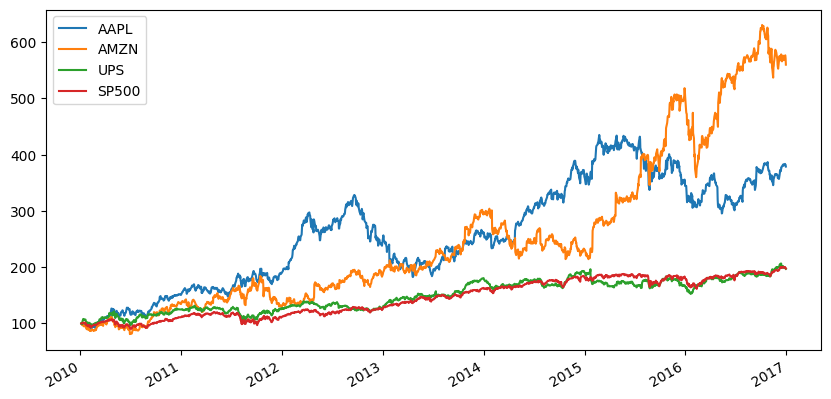

In [36]:
normalized = prices.div(prices.iloc[0]).mul(100)
normalized.plot()

In [40]:
normalized.columns

Index(['AAPL', 'AMZN', 'UPS', 'SP500'], dtype='object')

Use dot-sub with the keyword axis equals 0 to align the Series index with the DataFrame index. This causes Pandas to subtract the Series from each column.

In [42]:
# Plotting perforance difference 'AAPL'	'AMZN'	'UPS'
tickers=['AAPL','AMZN','UPS']
diff = normalized[tickers].sub(normalized['SP500'],axis=0)
diff.head()

,AAPL,AMZN,UPS
2010-01-04,0.000000,0.000000,0.000000
2010-01-05,-0.115294,0.278428,-0.139685
2010-01-06,-1.772895,-1.598550,-0.933493
2010-01-07,-2.370758,-3.680501,-2.091359
2010-01-08,-2.006904,-1.342056,2.362158


As a result, you can now see how each stock performed relative to the benchmark.

<Axes: >

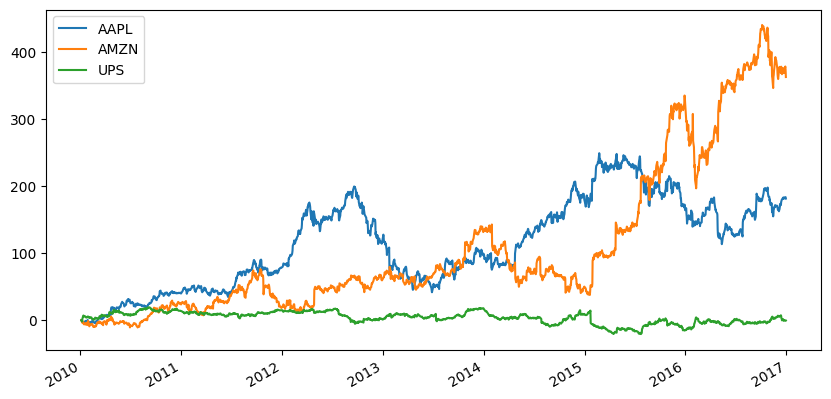

In [43]:
diff.plot()

**Instructions**

* Import 'asset_classes.csv', using .read_csv() to parse dates in the 'DATE' column and set this column as the index, then assign the result to prices.
* Select the first price for each series using .iloc[0] on prices and assign the result to first_prices.
* Divide prices by first_prices, multiply by 100 and assign the result to normalized.
* Plot normalized.

In [44]:
# Import data here
prices = pd.read_csv('../stock_data/asset_classes.csv', parse_dates=['DATE'], index_col='DATE')
prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2469 entries, 2007-06-29 to 2017-06-26
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SP500   2469 non-null   float64
 1   Bonds   2469 non-null   float64
 2   Gold    2469 non-null   float64
 3   Oil     2469 non-null   float64
dtypes: float64(4)
memory usage: 96.4 KB


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2469 entries, 2007-06-29 to 2017-06-26
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SP500   2469 non-null   float64
 1   Bonds   2469 non-null   float64
 2   Gold    2469 non-null   float64
 3   Oil     2469 non-null   float64
dtypes: float64(4)
memory usage: 96.4 KB
None


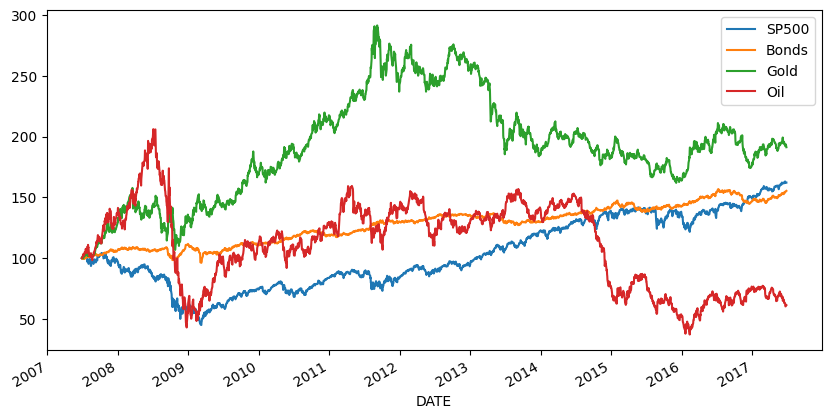

In [45]:
# Inspect prices here
print(prices.info())

# Select first prices
first_prices = prices.iloc[0]

# Create normalized
normalized = prices.div(first_prices).mul(100)

# Plot normalized
normalized.plot()
plt.show()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   JNJ     1762 non-null   float64
 1   JPM     1762 non-null   float64
 2   XOM     1762 non-null   float64
 3   DJIA    1762 non-null   float64
dtypes: float64(4)
memory usage: 68.8 KB
None


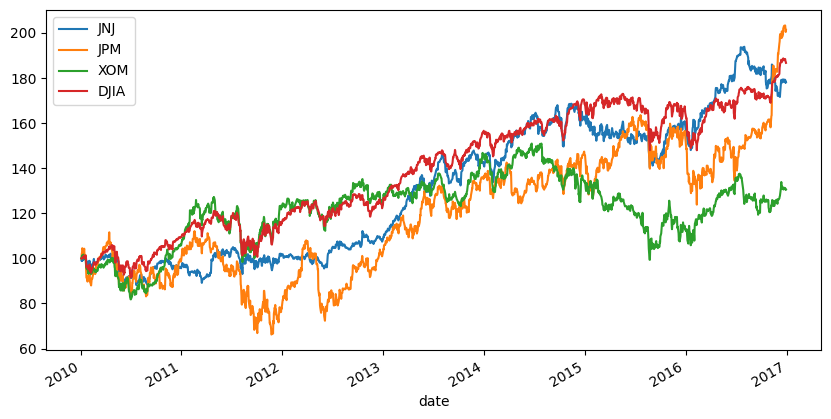

In [47]:
# Import stock prices and index here
stocks = pd.read_csv('../stock_data/nyse.csv', parse_dates=['date'], index_col='date')
dow_jones = pd.read_csv('../stock_data/dow_jones.csv', parse_dates=['date'], index_col='date')

# Concatenate data and inspect result here
data = pd.concat([stocks, dow_jones], axis=1)
print(data.info())

# Normalize and plot your data here
first_value = data.iloc[0]
normalized = data.div(first_value).mul(100).plot();

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   JNJ     1762 non-null   float64
 1   JPM     1762 non-null   float64
 2   XOM     1762 non-null   float64
 3   DJIA    1762 non-null   float64
dtypes: float64(4)
memory usage: 68.8 KB
None


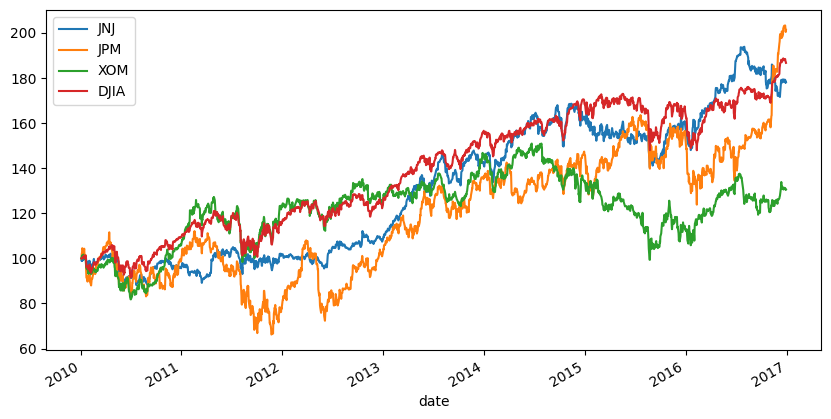

In [49]:
# Import stock prices and index here
stocks=pd.read_csv('../stock_data/nyse.csv')
stocks.date=pd.to_datetime(stocks.date)
stocks.set_index('date', inplace=True)

dow_jones=pd.read_csv('../stock_data/dow_jones.csv')
dow_jones.date=pd.to_datetime(dow_jones.date)
dow_jones.set_index('date', inplace=True)

# Concatenate data and inspect result here
data = pd.concat([stocks,dow_jones],axis=1)
print(data.info())

# Normalize and plot your data here

data.div(data.iloc[0]).mul(100).plot()
plt.show()

## Plot performance difference vs benchmark index

In the video, you learned how to calculate and plot the performance difference of a stock in percentage points relative to a benchmark index.

Let's compare the performance of Microsoft (MSFT) and Apple (AAPL) to the S&P 500 over the last 10 years

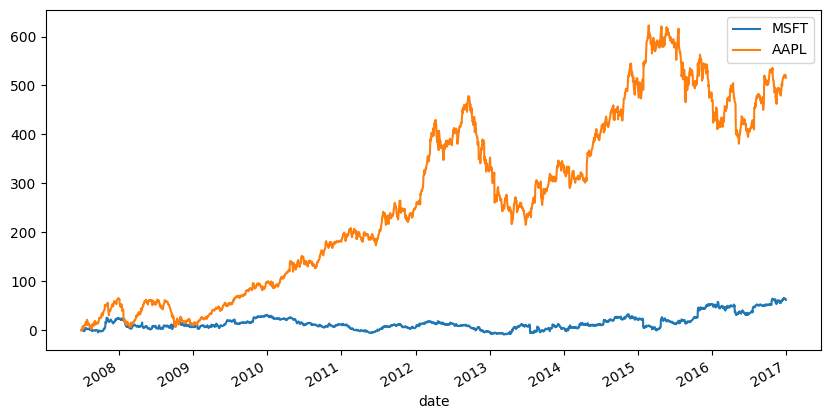

In [50]:
# Create tickers
tickers = ['MSFT', 'AAPL']

# Import stock data here
stocks = pd.read_csv('../stock_data/msft_aapl.csv', parse_dates=['date'], index_col='date')


# Import index here
sp500 = pd.read_csv('../stock_data/sp500.csv', parse_dates=['date'], index_col='date')

# Concatenate stocks and index here
data = pd.concat([stocks,sp500],axis=1).dropna()

# Normalize data
normalized = data.div(data.iloc[0]).mul(100)

# Subtract the normalized index from the normalized stock prices, and plot the result
normalized[tickers].sub(normalized['SP500'], axis=0).plot();
plt.show()


Video

## Changing the time series frequency: resampling

## Getting started:quarterly data

In [51]:
dates = pd.date_range(start='2016',periods=4,freq='Q')
data = range(1,5)
quarterly = pd.Series(data=data, index=dates)
quarterly

2016-03-31    1
2016-06-30    2
2016-09-30    3
2016-12-31    4
Freq: Q-DEC, dtype: int64

## Upsampling: quarter-> month

In [52]:
monthly = quarterly.asfreq('M') # to month-end frequency
monthly

2016-03-31    1.0
2016-04-30    NaN
2016-05-31    NaN
2016-06-30    2.0
2016-07-31    NaN
2016-08-31    NaN
2016-09-30    3.0
2016-10-31    NaN
2016-11-30    NaN
2016-12-31    4.0
Freq: M, dtype: float64

Pandas adds new month-end dates to the DateTimeIndex between the existing dates. As a result, there are now several months with missing data between March and December. You may also consider the first two months as missing. Let's compare three ways that pandas offers to fill missing values when upsampling. We'll create a DataFrame that contains all alternatives to the baseline, our first column. You can convert a Series to a DataFrame by applying the to_frame() method, passing a column name as parameter.

In [53]:
## Upsampling creates missing values

monthly = monthly.to_frame('baseline')# to DataFrame
monthly

,baseline
2016-03-31,1.0
2016-04-30,NaN
2016-05-31,NaN
2016-06-30,2.0
2016-07-31,NaN
2016-08-31,NaN
2016-09-30,3.0
2016-10-31,NaN
2016-11-30,NaN
2016-12-31,4.0


The first two options involve choosing a fill method, either forward fill or backfill. The third option is to provide a fill value

In [54]:
# Upsampling: fill methods
monthly['ffill'] = quarterly.asfreq('M', method='ffill')
monthly['bfill'] = quarterly.asfreq('M', method='bfill')
monthly['bfill'] = quarterly.asfreq('M', fill_value=0)
monthly

,baseline,ffill,bfill
2016-03-31,1.0,1,1
2016-04-30,NaN,1,0
2016-05-31,NaN,1,0
2016-06-30,2.0,2,2
2016-07-31,NaN,2,0
2016-08-31,NaN,2,0
2016-09-30,3.0,3,3
2016-10-31,NaN,3,0
2016-11-30,NaN,3,0
2016-12-31,4.0,4,4


If you want a monthly DateTimeIndex that covers the full year, you can use reindex. Pandas aligns existing data with the new monthly values, and produces missing values elsewhere. You can use the exact same fill options for reindex as you just did for asfreq.

## Convert monthly to weekly 

You have learned in the video how to use `.reindex()` to conform an existing time series to a `DateTimeIndex` at a different frequency.

Let's practice this method by creating monthly data and then converting this data to weekly frequency while applying various fill logic options.

In [55]:
# Set start and end dates
start = '2016-1-1'
end = '2016-2-29'

# Create monthly_dates here
monthly_dates = pd.date_range(start=start, end=end, freq= 'M')
monthly_dates

DatetimeIndex(['2016-01-31', '2016-02-29'], dtype='datetime64[ns]', freq='M')

In [59]:
# Create and print monthly here
monthly = pd.Series(data=[1,2],index=monthly_dates)
print(monthly)

2016-01-31    1
2016-02-29    2
Freq: M, dtype: int64


In [61]:
# Create weekly_dates here
weekly_dates = pd.date_range(start=start, end=end, freq= 'W')


In [62]:
# Print monthly, reindexed using weekly_dates
print(monthly.reindex(weekly_dates))

2016-01-03    NaN
2016-01-10    NaN
2016-01-17    NaN
2016-01-24    NaN
2016-01-31    1.0
2016-02-07    NaN
2016-02-14    NaN
2016-02-21    NaN
2016-02-28    NaN
Freq: W-SUN, dtype: float64


In [63]:
print(monthly.reindex(weekly_dates, method='bfill'))

2016-01-03    1
2016-01-10    1
2016-01-17    1
2016-01-24    1
2016-01-31    1
2016-02-07    2
2016-02-14    2
2016-02-21    2
2016-02-28    2
Freq: W-SUN, dtype: int64


In [64]:
print(monthly.reindex(weekly_dates, method='ffill'))

2016-01-03    NaN
2016-01-10    NaN
2016-01-17    NaN
2016-01-24    NaN
2016-01-31    1.0
2016-02-07    1.0
2016-02-14    1.0
2016-02-21    1.0
2016-02-28    1.0
Freq: W-SUN, dtype: float64


## Create weekly from monthly unemployment data

The civilian US unemployment rate is reported monthly. You may need more frequent data, but that's no problem because you just learned how to upsample a time series.

You'll work with the time series data for the last 20 years, and apply a few options to fill in missing values before plotting the weekly series.

In [65]:
# Import data here
data = pd.read_csv('../stock_data/unrate_2000.csv', parse_dates=['date'], index_col='date')
data.head()

,UNRATE
date,
2000-01-01,4.0
2000-02-01,4.1
2000-03-01,4.0
2000-04-01,3.8
2000-05-01,4.0


In [66]:
# Show first five rows of weekly series
print(data.asfreq('W').head(5))

            UNRATE
date              
2000-01-02     NaN
2000-01-09     NaN
2000-01-16     NaN
2000-01-23     NaN
2000-01-30     NaN


In [67]:
# Show first five rows of weekly series with bfill option
print(data.asfreq('W', method='bfill').head(5))

            UNRATE
date              
2000-01-02     4.1
2000-01-09     4.1
2000-01-16     4.1
2000-01-23     4.1
2000-01-30     4.1


In [69]:

# Create weekly series with ffill option and show first five rows
weekly_ffill = data.asfreq('W', method='ffill')
print(weekly_ffill.head(5))

            UNRATE
date              
2000-01-02     4.0
2000-01-09     4.0
2000-01-16     4.0
2000-01-23     4.0
2000-01-30     4.0


<Axes: xlabel='date'>

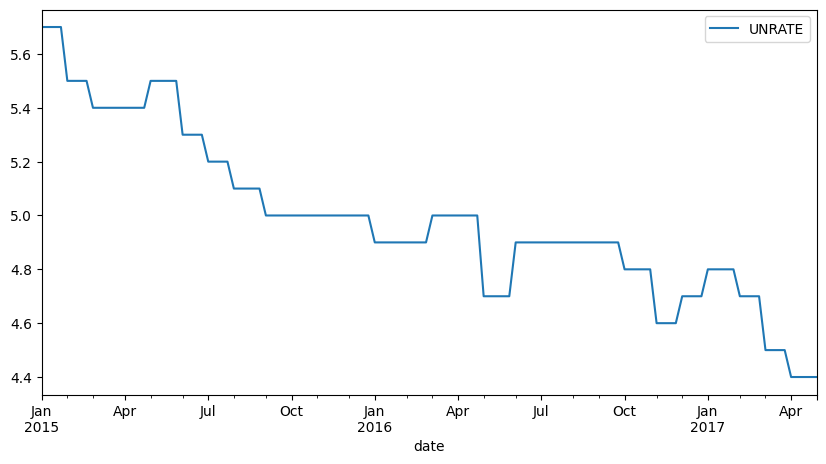

In [70]:
# Plot weekly_fill starting 2015 here 
weekly_ffill.loc['2015':].plot()

![images](resampling.png)

## Video: Upsampling & interpolation with .resample()

In [73]:
gdp = pd.read_csv('../stock_data/gdp_growth.csv',parse_dates=['date'], index_col='date')
gdp

,gdp_growth
date,
2007-01-01,0.2
2007-04-01,3.1
2007-07-01,2.7
2007-10-01,1.4
2008-01-01,-2.7
2008-04-01,2.0
2008-07-01,-1.9
2008-10-01,-8.2
2009-01-01,-5.4


In [74]:
gdp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41 entries, 2007-01-01 to 2017-01-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   gdp_growth  41 non-null     float64
dtypes: float64(1)
memory usage: 656.0 bytes


In [75]:
gdp.head(2)

,gdp_growth
date,
2007-01-01,0.2
2007-04-01,3.1


Interpolate monthly real GDP growth

convert to `month start` (`MS`) frequency

In [76]:
gdp_1=gdp.resample('MS').ffill().add_suffix('_ffill')
gdp_1

,gdp_growth_ffill
date,
2007-01-01,0.2
2007-02-01,0.2
2007-03-01,0.2
2007-04-01,3.1
2007-05-01,3.1
...,...
2016-09-01,3.5
2016-10-01,2.1
2016-11-01,2.1


* .interpolate(): finds points on straight line between existing data.

In [77]:
gdp_2=gdp.resample('MS').interpolate().add_suffix('_inter')
gdp_2

,gdp_growth_inter
date,
2007-01-01,0.200000
2007-02-01,1.166667
2007-03-01,2.133333
2007-04-01,3.100000
2007-05-01,2.966667
...,...
2016-09-01,2.566667
2016-10-01,2.100000
2016-11-01,1.866667


## Use interpolation to create weekly employment data

You have recently used the civilian US unemployment rate, and converted it from monthly to weekly frequency using simple `forward` or `backfill` methods.

Compare your previous approach to the new `.interpolate()` method that you learned about in this video.

In [78]:
unrate = pd.read_csv('../stock_data/unrate.csv', parse_dates=['DATE'], index_col='DATE')
monthly = unrate.resample('MS').first()
monthly.head()

,UNRATE
DATE,
2010-01-01,9.8
2010-02-01,9.8
2010-03-01,9.9
2010-04-01,9.9
2010-05-01,9.6


In [79]:
monthly.index

DatetimeIndex(['2010-01-01', '2010-02-01', '2010-03-01', '2010-04-01',
               '2010-05-01', '2010-06-01', '2010-07-01', '2010-08-01',
               '2010-09-01', '2010-10-01', '2010-11-01', '2010-12-01',
               '2011-01-01', '2011-02-01', '2011-03-01', '2011-04-01',
               '2011-05-01', '2011-06-01', '2011-07-01', '2011-08-01',
               '2011-09-01', '2011-10-01', '2011-11-01', '2011-12-01',
               '2012-01-01', '2012-02-01', '2012-03-01', '2012-04-01',
               '2012-05-01', '2012-06-01', '2012-07-01', '2012-08-01',
               '2012-09-01', '2012-10-01', '2012-11-01', '2012-12-01',
               '2013-01-01', '2013-02-01', '2013-03-01', '2013-04-01',
               '2013-05-01', '2013-06-01', '2013-07-01', '2013-08-01',
               '2013-09-01', '2013-10-01', '2013-11-01', '2013-12-01',
               '2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01',
      

In [80]:
monthly.index.min()

Timestamp('2010-01-01 00:00:00')

In [81]:
# Create weekly dates
weekly_dates = pd.date_range(start=monthly.index.min(), end=monthly.index.max(),freq='W')
weekly_dates

DatetimeIndex(['2010-01-03', '2010-01-10', '2010-01-17', '2010-01-24',
               '2010-01-31', '2010-02-07', '2010-02-14', '2010-02-21',
               '2010-02-28', '2010-03-07',
               ...
               '2016-10-30', '2016-11-06', '2016-11-13', '2016-11-20',
               '2016-11-27', '2016-12-04', '2016-12-11', '2016-12-18',
               '2016-12-25', '2017-01-01'],
              dtype='datetime64[ns]', length=366, freq='W-SUN')

In [82]:
# Reindex monthly to weekly data
weekly = monthly.reindex(weekly_dates)
weekly

,UNRATE
2010-01-03,NaN
2010-01-10,NaN
2010-01-17,NaN
2010-01-24,NaN
2010-01-31,NaN
...,...
2016-12-04,NaN
2016-12-11,NaN
2016-12-18,NaN
2016-12-25,NaN


In [83]:
# Create ffill and interpolated columns
weekly['ffill'] = weekly.UNRATE.ffill()
weekly['ffill']

2010-01-03    NaN
2010-01-10    NaN
2010-01-17    NaN
2010-01-24    NaN
2010-01-31    NaN
             ... 
2016-12-04    4.7
2016-12-11    4.7
2016-12-18    4.7
2016-12-25    4.7
2017-01-01    4.8
Freq: W-SUN, Name: ffill, Length: 366, dtype: float64

In [84]:
weekly['interpolated'] = weekly.UNRATE.interpolate()
weekly['interpolated']

2010-01-03         NaN
2010-01-10         NaN
2010-01-17         NaN
2010-01-24         NaN
2010-01-31         NaN
                ...   
2016-12-04    4.788571
2016-12-11    4.791429
2016-12-18    4.794286
2016-12-25    4.797143
2017-01-01    4.800000
Freq: W-SUN, Name: interpolated, Length: 366, dtype: float64

<Axes: >

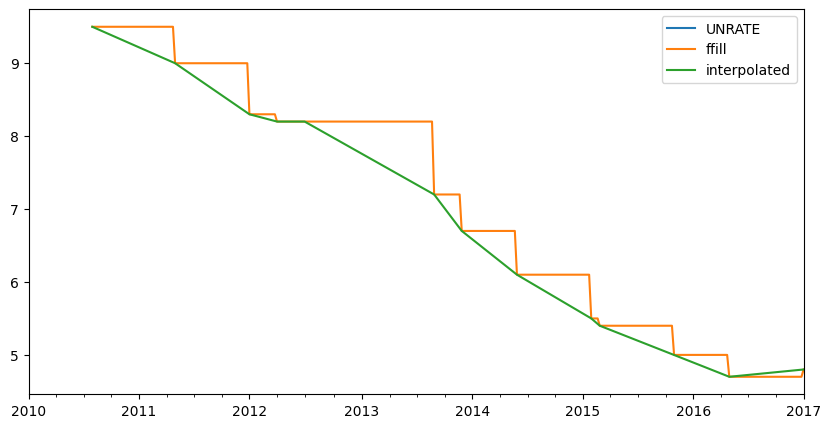

In [85]:
# Plot weekly
weekly.plot()

## Interpolate debt/GDP and compare to unemployment

Since you have learned how to interpolate time series, you can now apply this new skill to the quarterly debt/GDP series, and compare the result to the monthly unemployment rate

In [87]:
# Import & inspect data here
data = pd.read_csv('../stock_data/debt_unemployment.csv', parse_dates=['date'], index_col='date')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 89 entries, 2010-01-01 to 2017-05-01
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Debt/GDP      29 non-null     float64
 1   Unemployment  89 non-null     float64
dtypes: float64(2)
memory usage: 2.1 KB
None


In [88]:
# Interpolate and inspect here
interpolated = data.interpolate()
print(interpolated.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 89 entries, 2010-01-01 to 2017-05-01
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Debt/GDP      89 non-null     float64
 1   Unemployment  89 non-null     float64
dtypes: float64(2)
memory usage: 2.1 KB
None


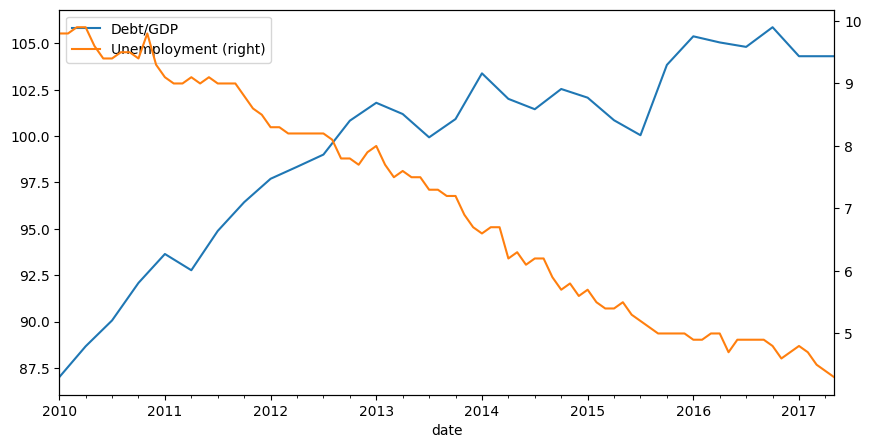

In [89]:
# Plot interpolated data here
interpolated.plot(secondary_y='Unemployment');

## Video: Downsampling & aggregation

learn how to down-sample, that is, how to reduce the frequency of your time series. This includes, for instance, converting hourly data to daily data, or daily data to monthly data. Thus summarizing existing data.

In [90]:
ozone = pd.read_csv('../air_quality_data/ozone_nyc.csv',parse_dates=['date'],index_col='date')
ozone.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6291 entries, 2000-01-01 to 2017-03-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ozone   6167 non-null   float64
dtypes: float64(1)
memory usage: 98.3 KB


In [91]:
ozone.head()

,Ozone
date,
2000-01-01,0.004032
2000-01-02,0.009486
2000-01-03,0.005580
2000-01-04,0.008717
2000-01-05,0.013754


In [92]:
ozone=ozone.resample('D').asfreq()
ozone.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6300 entries, 2000-01-01 to 2017-03-31
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ozone   6167 non-null   float64
dtypes: float64(1)
memory usage: 98.4 KB


Covert daily ozone data to monthly frequency.

In [93]:
ozone.resample('M').mean().head()

,Ozone
date,
2000-01-31,0.010443
2000-02-29,0.011817
2000-03-31,0.016810
2000-04-30,0.019413
2000-05-31,0.026535


`resample().mean()`: Monthly average, assigned to end of calendar month.

In [94]:
ozone.resample('M').median().head()

,Ozone
date,
2000-01-31,0.009486
2000-02-29,0.010726
2000-03-31,0.017004
2000-04-30,0.019866
2000-05-31,0.026018


In [95]:
ozone.resample('M').agg(['mean','std']).head()

Ozone          
                mean       std
date                          
2000-01-31  0.010443  0.004755
2000-02-29  0.011817  0.004072
2000-03-31  0.016810  0.004977
2000-04-30  0.019413  0.006574
2000-05-31  0.026535  0.008409

Visualize relative to the original data at calendar day frequency.

<Axes: xlabel='date'>

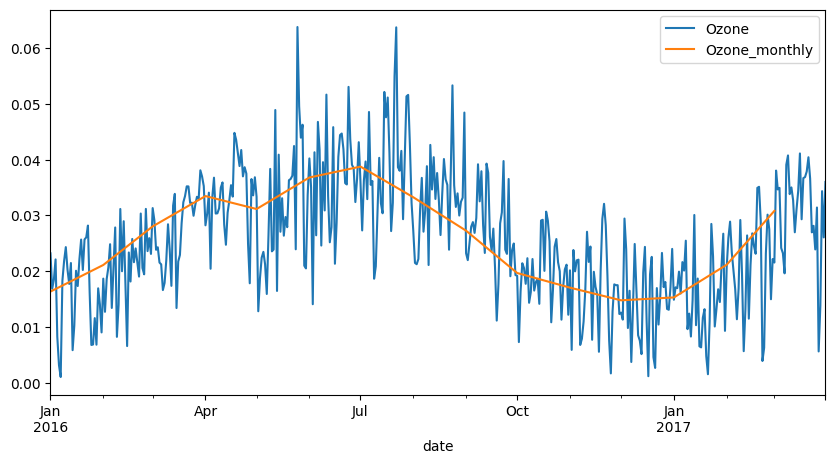

In [96]:
ozone =ozone.loc['2016':]
ax = ozone.plot()
monthly = ozone.resample('M').mean()
monthly.add_suffix('_monthly').plot(ax=ax)

The first plot ozone is the original series, while the second plot `ozone_monthly`is the averaged series.

Resampling multiple time series

In [97]:
data = pd.read_csv('../air_quality_data/ozone_nyla.csv',parse_dates=['date'],index_col='date')
data.head()

,Los Angeles,New York
date,,
2000-01-01,0.008375,0.004032
2000-01-02,NaN,0.009486
2000-01-03,NaN,0.005580
2000-01-04,0.005500,0.008717
2000-01-05,0.005000,0.013754


In [98]:
data = data.resample('D').asfreq()
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6300 entries, 2000-01-01 to 2017-03-31
Freq: D
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Los Angeles  5488 non-null   float64
 1   New York     6167 non-null   float64
dtypes: float64(2)
memory usage: 147.7 KB


In [99]:
len(data['Los Angeles'])

6300

In [100]:
data =data.resample('BM').mean()#BM: Business Month
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 207 entries, 2000-01-31 to 2017-03-31
Freq: BM
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Los Angeles  200 non-null    float64
 1   New York     207 non-null    float64
dtypes: float64(2)
memory usage: 4.9 KB


In [101]:
# Show month end
data.resample('M').first().head()

,Los Angeles,New York
date,,
2000-01-31,0.004734,0.010443
2000-02-29,0.009648,0.011817
2000-03-31,0.016694,0.016810
2000-04-30,0.019598,0.018955
2000-05-31,0.025653,0.026492


In [102]:
# Show month start
data.resample('MS').first().head()

,Los Angeles,New York
date,,
2000-01-01,0.004734,0.010443
2000-02-01,0.009648,0.011817
2000-03-01,0.016694,0.016810
2000-04-01,0.019598,0.018955
2000-05-01,0.025653,0.026492


## Compare weekly, monthly and annual ozone trends for NYC & LA

You have seen in the video how to downsample and aggregate time series on air quality.

First, you'll apply this new skill to ozone data for both NYC and LA since 2000 to compare the air quality trend at weekly, monthly and annual frequencies and explore how different resampling periods impact the visualization.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6291 entries, 2000-01-01 to 2017-03-31
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Los Angeles  5488 non-null   float64
 1   New York     6167 non-null   float64
dtypes: float64(2)
memory usage: 147.4 KB
None


<Axes: xlabel='date'>

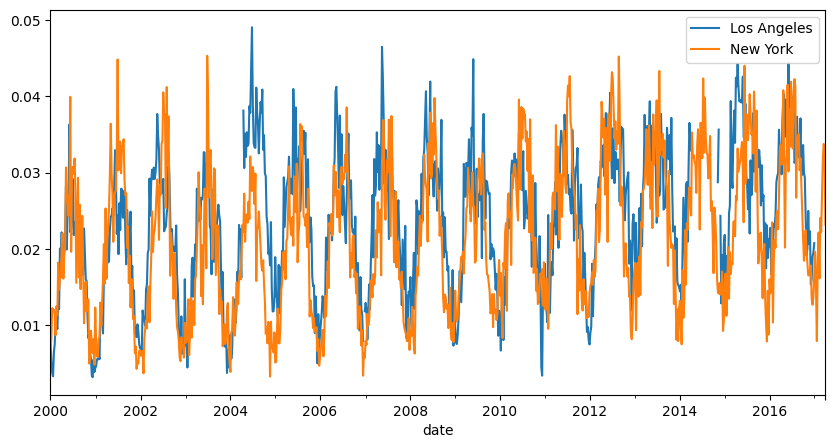

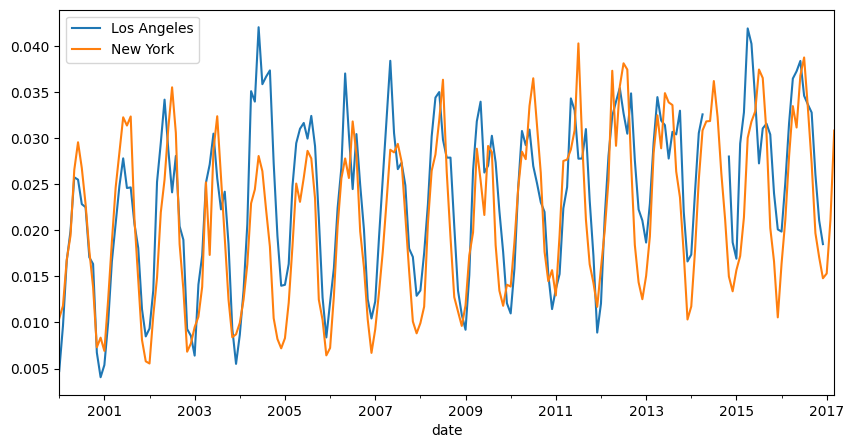

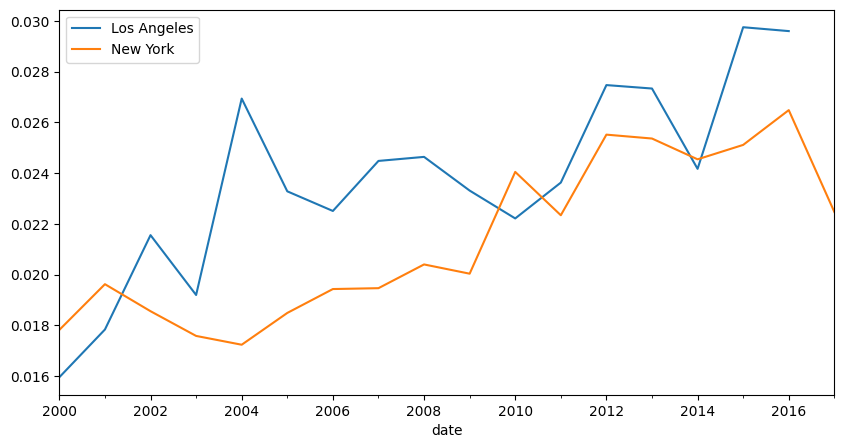

In [103]:
# Import and inspect data here
ozone = pd.read_csv('../air_quality_data/ozone_nyla.csv', parse_dates=['date'], index_col='date')
print(ozone.info())

# Calculate and plot the weekly average ozone trend
ozone.resample('W').mean().plot()

# Calculate and plot the monthly average ozone trend
ozone.resample('M').mean().plot()

# Calculate and plot the annual average ozone trend
ozone.resample('A').mean().plot()

## Compare monthly average stock prices for Facebook and Google

Now, you'll apply your new resampling skills to daily stock price series for Facebook and Google for the 2015-2016 period to compare the trend of the monthly averages.

In [104]:
# Import and inspect data here
stocks = pd.read_csv('../stock_data/goog_fb.csv', parse_dates=['date'], index_col='date')
print(stocks.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 504 entries, 2015-01-02 to 2016-12-30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FB      504 non-null    float64
 1   GOOG    504 non-null    float64
dtypes: float64(2)
memory usage: 11.8 KB
None


In [105]:
stocks.head()

,FB,GOOG
date,,
2015-01-02,78.45,524.81
2015-01-05,77.19,513.87
2015-01-06,76.15,501.96
2015-01-07,76.15,501.10
2015-01-08,78.18,502.68


array([<Axes: xlabel='date'>, <Axes: xlabel='date'>], dtype=object)

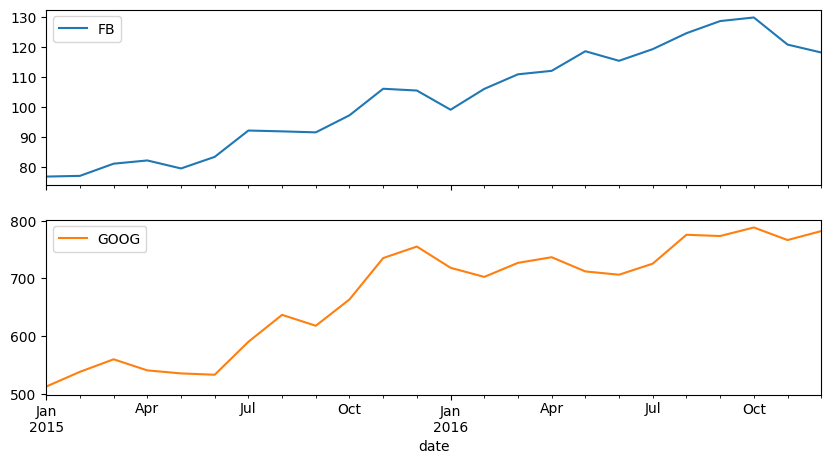

In [106]:
# Calculate and plot the monthly average
monthly_average = stocks.resample('M').mean()
monthly_average.plot(subplots=True )

## Compare quarterly GDP growth rate and stock returns

With your new skill to downsample and aggregate time series, you can compare higher-frequency stock price series to lower-frequency economic time series.

As a first example, let's compare the quarterly GDP growth rate to the quarterly rate of return on the (resampled) Dow Jones Industrial index of 30 large US stocks.

GDP growth is reported at the beginning of each quarter for the previous quarter. To calculate matching stock returns, you'll resample the stock index to quarter start frequency using the alias `'QS'`, and aggregating using the `.first()` observations.

In [107]:
# Import and inspect gdp_growth here
gdp_growth =pd.read_csv('../stock_data/gdp_growth.csv', parse_dates=['date'], index_col='date')
print(gdp_growth.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41 entries, 2007-01-01 to 2017-01-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   gdp_growth  41 non-null     float64
dtypes: float64(1)
memory usage: 656.0 bytes
None


In [108]:
# Import and inspect djia here
djia = pd.read_csv('../stock_data/djia.csv', parse_dates=['date'], index_col='date')
print(djia.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2610 entries, 2007-06-29 to 2017-06-29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   djia    2519 non-null   float64
dtypes: float64(1)
memory usage: 40.8 KB
None


* Resample `djia` using frequency alias `'QS'`, aggregate using `.first()`, and assign to `djia_quarterly`.
* Apply `.pct_change()` to `djia_quarterly` and `.mul()` by 100 to obtain `djia_quarterly_return`.

In [109]:

# Calculate djia quarterly returns here 
djia_quarterly = djia.resample('QS').first()
djia_quarterly.head()

,djia
date,
2007-04-01,13408.62
2007-07-01,13535.43
2007-10-01,14087.55
2008-01-01,13043.96
2008-04-01,12654.36


In [110]:
djia_quarterly_return = djia_quarterly.pct_change().mul(100)
djia_quarterly_return.head()

,djia
date,
2007-04-01,NaN
2007-07-01,0.945735
2007-10-01,4.079072
2008-01-01,-7.407889
2008-04-01,-2.986823


* Use pd.concat() to concatenate gdp_growth and djia_quarterly_return along axis=1, and assign to data. Rename the columns using .columns and the new labels 'gdp' and 'djia', then .plot() the results.

<Axes: xlabel='date'>

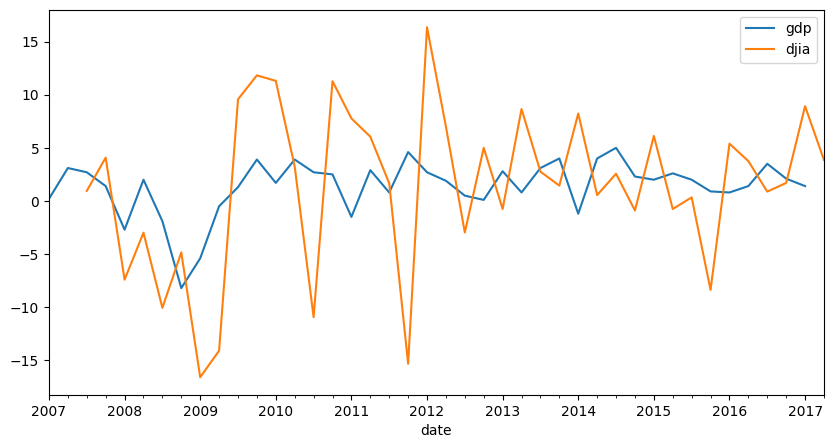

In [111]:
# Concatenate, rename and plot djia_quarterly_return and gdp_growth here
data = pd.concat([gdp_growth, djia_quarterly_return], axis=1)
data.columns = ['gdp', 'djia']
data.plot()

## Visualize monthly mean, median and standard deviation of S&P500 returns

You have also learned how to calculate several aggregate statistics from upsampled data.

Let's use this to explore how the monthly mean, median and standard deviation of daily S&P500 returns have trended over the last 10 years.

* Use `pd.read_csv()` to import `'sp500.csv'`, set a `DateTimeIndex` based on the `'date'` column using `parse_dates` and `index_col`, assign the results to `sp500`, and inspect using `.info()`.
* Convert `sp500` to a `pd.Series()` using `.squeeze()`, and apply `.pct_change()` to calculate `daily_returns`.
* `.resample()` `daily_returns` to month-end frequency (alias: `'M'`), and apply `.agg()` to calculate `'mean'`, `'median'`, and `'std'`. Assign the result to `stats`.
* `.plot()` `stats`.

In [112]:
# Import data here
sp500 = pd.read_csv('../stock_data/sp500.csv', parse_dates=['date'], index_col='date')
print(sp500.info())
print(sp500.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2395 entries, 2007-06-29 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SP500   2395 non-null   float64
dtypes: float64(1)
memory usage: 37.4 KB
None
              SP500
date               
2007-06-29  1503.35
2007-07-02  1519.43
2007-07-03  1524.87
2007-07-05  1525.40
2007-07-06  1530.44


In [115]:
sp500.squeeze().head()

date
2007-06-29    1503.35
2007-07-02    1519.43
2007-07-03    1524.87
2007-07-05    1525.40
2007-07-06    1530.44
Name: SP500, dtype: float64

In [113]:

# Calculate daily returns here
daily_returns = sp500.squeeze().pct_change()
daily_returns.head()

date
2007-06-29         NaN
2007-07-02    0.010696
2007-07-03    0.003580
2007-07-05    0.000348
2007-07-06    0.003304
Name: SP500, dtype: float64

In [114]:
# Resample and calculate statistics
stats = daily_returns.resample('M').agg(['mean', 'median', 'std'])
stats.head()

,mean,median,std
date,,,
2007-06-30,NaN,NaN,NaN
2007-07-31,-0.001490,0.000921,0.010908
2007-08-31,0.000668,0.001086,0.015261
2007-09-30,0.001900,0.000202,0.010000
2007-10-31,0.000676,-0.000265,0.008719


<Axes: xlabel='date'>

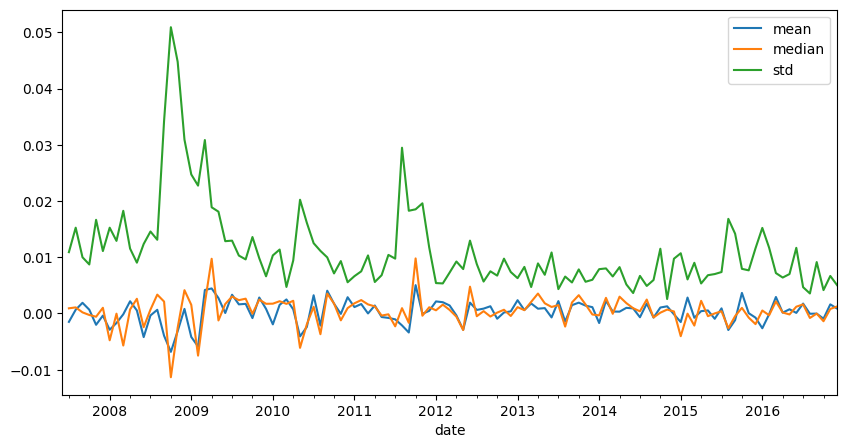

In [116]:
# Plot stats here
stats.plot()